In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('datasets/housing.data',sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351.0,17.9,392.43,6.36,23.1
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58,21.2
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398.0,15.2,393.87,6.68,32.0


In [4]:
# Same Simple linear Regration
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# X = df['PTRATIO'].values.reshape(-1,1)
X = df.iloc[:, :-3].values
y = df['MEDV']
X.shape, y.shape

((506, 11), (506,))

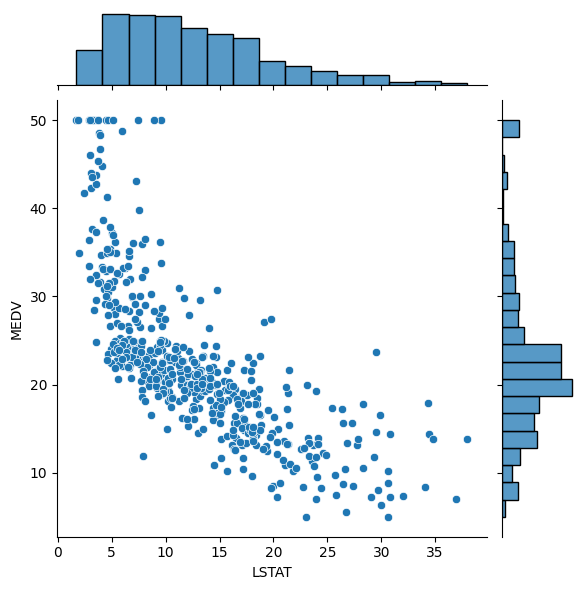

In [6]:
sns.jointplot(df, x='LSTAT', y='MEDV')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

In [8]:
# x_train = scale.fit_transform(x_train) # Becouse x train is 2D array and training data so need fit transform
# x_test = scale.transform(x_test) # Its 1D array just the testing values so only transform

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [10]:
predicted = model.predict(x_test)
print(predicted) , print(y_test)


[25.88420019 19.18619275 27.92137692  9.12551112 22.38743513 17.04175436
 18.45734949 20.01251764 17.58025669 21.59519919  3.97264203 21.22555846
 17.28368136  4.82164423 37.2043657  33.44841716 20.42586886 36.79870963
 30.42767825 22.07027545 23.81064371 21.90556999 20.72140019 30.12380673
 22.12103614  3.12689652 16.89589155 16.73125655 36.78454594 21.70410837
 17.8725703  15.75379785 18.57852083 24.01644622 27.76960898 16.98338611
 13.05478014 19.75338479 20.49145963 18.92656369 26.57448024 22.79635526
 23.01535935 13.78322309 23.03174696 24.12300999 21.31436284 22.12878204
 11.98118946 23.81629696 22.55612594]
329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
418     8.8
411    17.2
446    14.9
386    10.5
162    50.0
299    29.0
480    23.0
196    33.3
175    29.4
37     21.0
320    23.8
171    19.1
107    20.4
278    29.1
45     19.3
367    23.1
21     19.6
153    19.4
97     38.7
113    18.7
478    14.6
459   

(None, None)

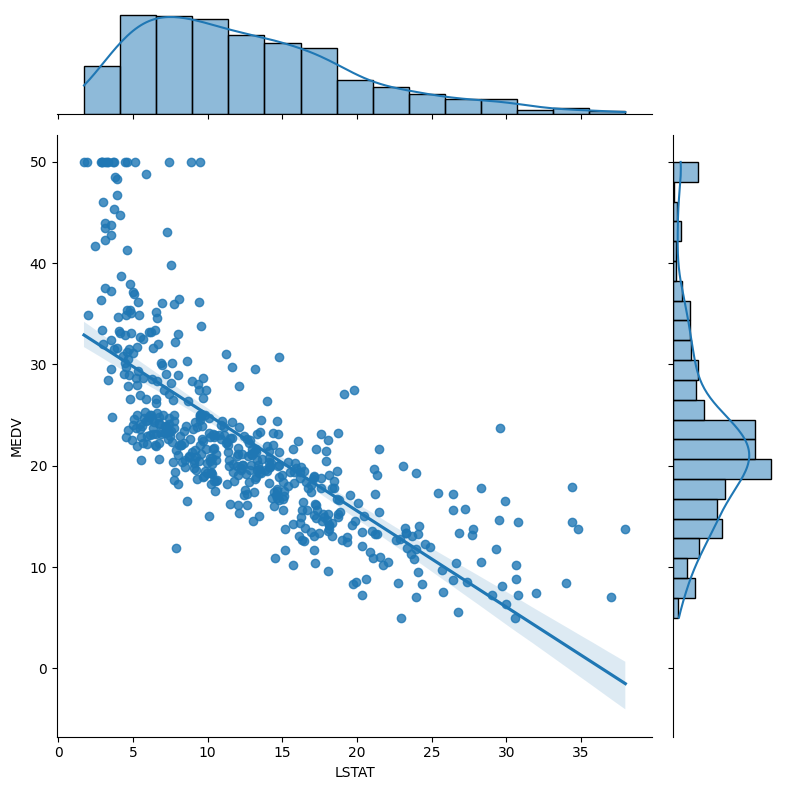

In [11]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

r2_score(y_train, y_train_pred)

0.7077872055521477

In [13]:
r2_score(y_test, y_test_pred)

0.31525576147241485